In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# Create the dataframe, forcing the names of the rows and columns to make it easier to work with
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv', 
                 index_col='City',
                 names=['City', 'Population', 'Violent Crime', 'Murder', 'Rape 1', 'Rape 2',
                       'Robbery', 'Aggravated assault', 'Property_crime', 'Burglary',
                       'Larceny-theft', 'Motor vehicle theft', 'Arson']
                )
df.head()

,Population,Violent Crime,Murder,Rape 1,Rape 2,Robbery,Aggravated assault,Property_crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
City,,,,,,,,,,,,
City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN


In [93]:
# Remove the columns we don't need and the excess first row
df = df.drop(index='City',
        columns=['Violent Crime', 'Rape 1', 'Rape 2', 'Aggravated assault', 
                'Burglary', 'Larceny-theft', 'Motor vehicle theft', 'Arson']
       )

In [94]:
# Remove the commas from the columns so that we can chance from strings to numbers
df.Population = df.Population.str.replace(',', '')
df.Murder = df.Murder.str.replace(',', '')
df.Robbery = df.Robbery.str.replace(',', '')
df.Property_crime = df.Property_crime.str.replace(',', '')
df.head()

,Population,Murder,Robbery,Property_crime
City,,,,
Adams Village,1861,0,0,12
Addison Town and Village,2577,0,0,24
Akron Village,2846,0,0,16
Albany,97956,8,227,4090
Albion Village,6388,0,4,223


In [95]:
# Change from strings to numbers
df.Population = pd.to_numeric(df.Population, errors='coerce')
df.Murder = pd.to_numeric(df.Murder, errors='coerce')
df.Robbery = pd.to_numeric(df.Robbery, errors='coerce')
df.Property_crime = pd.to_numeric(df.Property_crime, errors='coerce')
df.head(10)

,Population,Murder,Robbery,Property_crime
City,,,,
Adams Village,1861,0,0,12
Addison Town and Village,2577,0,0,24
Akron Village,2846,0,0,16
Albany,97956,8,227,4090
Albion Village,6388,0,4,223
Alfred Village,4089,0,3,46
Allegany Village,1781,0,0,10
Amherst Town,118296,1,31,2118
Amityville Village,9519,0,4,210


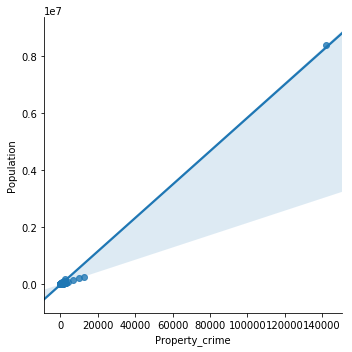

In [96]:
sns.lmplot(x='Property_crime', y='Population', data=df)

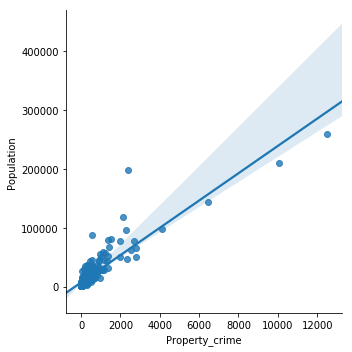

In [97]:
# Try graphing again with New York, the outlier, removed
sns.lmplot(x='Property_crime', y='Population', data=df.drop(index='New York'))

In [98]:
# That is much more manageable, so we will make the dropping of New York permanent
df = df.drop(index='New York')

In [99]:
# Now that the data is sufficiently cleaned, I will create the Population-squared feature
# and convert Murder and Robbery to categorical features with 0 or 1 values
df['Population_squared'] = df['Population'] ** 2

df['Murder'] = np.where(df['Murder']>0, 1, 0)
df['Robbery'] = np.where(df['Robbery']>0, 1, 0)

df.head(10)

,Population,Murder,Robbery,Property_crime,Population_squared
City,,,,,
Adams Village,1861,0,0,12,3463321
Addison Town and Village,2577,0,0,24,6640929
Akron Village,2846,0,0,16,8099716
Albany,97956,1,1,4090,9595377936
Albion Village,6388,0,1,223,40806544
Alfred Village,4089,0,1,46,16719921
Allegany Village,1781,0,0,10,3171961
Amherst Town,118296,1,1,2118,13993943616
Amityville Village,9519,0,1,210,90611361


In [101]:
# Finally, I will rearrange so that Population_squared is by population, and the target Property_crime is at the end
df = df[['Population', 'Population_squared', 'Murder', 'Robbery', 'Property_crime']]
df.head()

,Population,Population_squared,Murder,Robbery,Property_crime
City,,,,,
Adams Village,1861,3463321,0,0,12
Addison Town and Village,2577,6640929,0,0,24
Akron Village,2846,8099716,0,0,16
Albany,97956,9595377936,1,1,4090
Albion Village,6388,40806544,0,1,223


In [ ]:
# I have finished all of the assigned cleaning and feature engineering